In [8]:
import numpy as np
import pandas as pd
from PIL import Image
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
def get_dim(Im):
    """Takes an image as an input and gives dimensions for pixels (width and height)"""
    return Image.open(Im).size

In [3]:
def get_xy(Im):
    """Take an image and return all possible (x,y) coordinate combinations"""
    width, height = Image.open(Im).size
    return list(product(np.arange(width),np.arange(height)))

In [4]:
def get_rgb(Im):
    """Take an image and return rgb values for every pixel"""
    im = Image.open(Im) 
    pix = im.load()
    rgb = [pix[i,j] for i,j in get_xy(Im)]
    return rgb

In [5]:
def get_data(Im):
    """Take an image and extract all the coordinates and RGB values of each pixel. Returns a data frame 
    containing that information"""
    img_data = list(zip(get_xy(Im),get_rgb(Im)))
    df = []
    for i in img_data:
        columns = {'x':i[0][0],'y':i[0][1],'R':i[1][0],'G':i[1][1],'B':i[1][2]}
        df.append(columns)
    return pd.DataFrame(df)

In [6]:
def resize(Im,size,name):
    """Take an image and resize it. Takes the original Image Im as input, and resizes to the size specified and 
    outputs a new image with name chosen"""
    image = Image.open(Im)
    new_image = image.resize(size)
    new_image.save(name)

In [7]:
def plotter(Im, axis = None, title = None):
    """Take an image and get density plot for rgb values"""
    df = get_data(Im) 
    df = df.iloc[:,2:]
    palt = {'R':'red','G':'green','B':'blue'}
    df = df.melt(value_vars = ['R','G','B'])
    df.columns.values[0] = 'RGB'
    sns.kdeplot(data = df, hue = 'RGB', x = 'value', palette = palt, ax = axis).set(title = title)

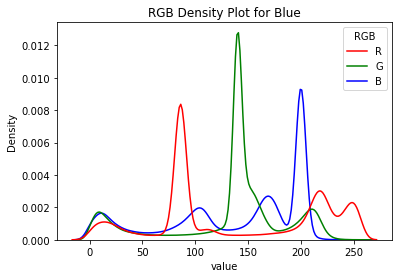

In [34]:
plotter('BLUE.jpeg', title = 'RGB Density Plot for Blue')

In [26]:
df = get_data('BLUE.jpeg')

In [27]:
df

,x,y,R,G,B
0,0,0,86,140,200
1,0,1,86,140,200
2,0,2,86,140,200
3,0,3,86,140,200
4,0,4,86,140,200
...,...,...,...,...,...
562495,749,745,86,140,200
562496,749,746,86,140,200
562497,749,747,86,140,200
562498,749,748,86,140,200


In [23]:
df = df.iloc[:,2:]
df

,R,G,B
0,86,140,200
1,86,140,200
2,86,140,200
3,86,140,200
4,86,140,200
...,...,...,...
562495,86,140,200
562496,86,140,200
562497,86,140,200
562498,86,140,200


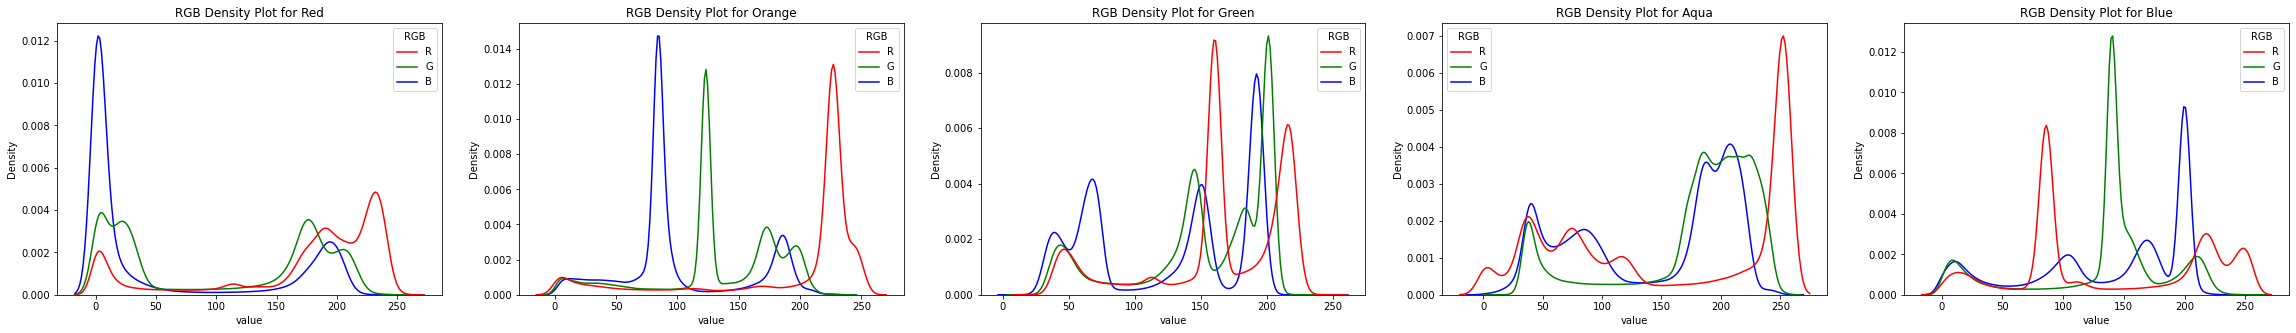

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=5,figsize = (40,5))
plotter('RED.png', axis = ax[0], title = 'RGB Density Plot for Red')
plotter('ORANGE.png', axis = ax[1], title = 'RGB Density Plot for Orange')
plotter('GREEN.png', axis = ax[2], title = 'RGB Density Plot for Green')
plotter('AQUA.png', axis = ax[3], title = 'RGB Density Plot for Aqua')
plotter('BLUE.jpeg', axis = ax[4], title = 'RGB Density Plot for Blue')

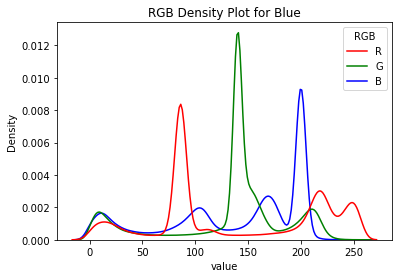

In [8]:
plotter('BLUE.jpeg', axis = None, title = 'RGB Density Plot for Blue')

For the blue shot Marilyn, we can see that most of the pixels have a blue value of 200 (specifically 30.56% of the pixels). Also it seems that there's very few pixels that have a blue value greater than 200 judging by the extremely low density beyond the 200 point. For the green values, most of the pixels (31.37%) have a green value of 140. We can also see that there's an extremely low density beyond the 225 for the green value and that hardly any pixels have a green value above 225. As for red, the most frequent red value is at 86 with roughly 30.92% Pixels having a red value of 86. Also based on the density plot, there doesn't seem to be certain red values that have an exceptionally low amount of pixels.

In [37]:
print(df['R'].value_counts(normalize = True).head(n = 50))

86     0.309209
255    0.018841
218    0.011417
219    0.011378
217    0.011243
220    0.010940
216    0.010743
221    0.010407
215    0.010092
222    0.009774
214    0.009486
250    0.009278
223    0.008882
249    0.008834
251    0.008734
213    0.008679
248    0.008603
212    0.007936
247    0.007908
252    0.007874
224    0.007801
246    0.007465
211    0.007284
85     0.007278
245    0.007065
225    0.006971
253    0.006809
210    0.006588
244    0.006443
226    0.005929
243    0.005813
254    0.005751
209    0.005733
88     0.005623
242    0.005470
208    0.005241
227    0.005212
241    0.004960
228    0.004608
207    0.004603
240    0.004437
89     0.004247
0      0.004238
239    0.004206
229    0.004194
206    0.004146
238    0.003945
230    0.003893
15     0.003673
205    0.003618
Name: R, dtype: float64


In [36]:
df['G'].value_counts(normalize = True)[range(200,251)]

200    0.003634
201    0.004034
202    0.004149
203    0.004377
204    0.004699
205    0.005198
206    0.005269
207    0.005593
208    0.005945
209    0.006060
210    0.006318
211    0.006197
212    0.006224
213    0.006386
214    0.005852
215    0.005479
216    0.005068
217    0.004620
218    0.003986
219    0.003452
220    0.002741
221    0.002300
222    0.001721
223    0.001454
224    0.001124
225    0.000960
226    0.000791
227    0.000676
228    0.000553
229    0.000409
230    0.000363
231    0.000274
232    0.000245
233    0.000215
234    0.000158
235    0.000137
236    0.000107
237    0.000084
238    0.000069
239    0.000078
240    0.000053
241    0.000043
242    0.000050
243    0.000030
244    0.000021
245    0.000043
246    0.000030
247    0.000025
248    0.000009
249    0.000011
250    0.000014
Name: G, dtype: float64

In [91]:
df = get_data('BLUE.jpeg')
dfn = df.iloc[:,2:].copy()
for i in range(3):
    dfn.iloc[:,i] = (dfn.iloc[:,i]-dfn.iloc[:,i].mean())/dfn.iloc[:,i].std()
kmeans = KMeans(n_clusters=9)
kmeans_result = kmeans.fit(np.asarray(dfn))
df['Cluster'] = kmeans_result.labels_
df

/Users/claytonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,x,y,R,G,B,Cluster
0,0,0,86,140,200,4
1,0,1,86,140,200,4
2,0,2,86,140,200,4
3,0,3,86,140,200,4
4,0,4,86,140,200,4
...,...,...,...,...,...,...
562495,749,745,86,140,200,4
562496,749,746,86,140,200,4
562497,749,747,86,140,200,4
562498,749,748,86,140,200,4


In [164]:
df = get_data('BLUE.jpeg')
dfn = df.iloc[:,2:].copy()
for i in range(3):
    dfn.iloc[:,i] = (dfn.iloc[:,i]-dfn.iloc[:,i].mean())/dfn.iloc[:,i].std()
kmeans = KMeans(n_clusters=9)
kmeans_result = kmeans.fit(np.asarray(dfn))
df['Cluster'] = kmeans_result.labels_
df
def inspect(Im,cluster,background = (255,255,255)):
    """This function is dependent on the code block above. View all the pixels in a specific cluster
    derived from k-means"""
    ind = df.loc[df['Cluster'] != cluster,['x','y']]
    im = Image.open(Im)
    pix = im.load()
    for i,j in zip(list(ind['x']),list(ind['y'])):
        pix[i,j] = background
    return im

/Users/claytonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


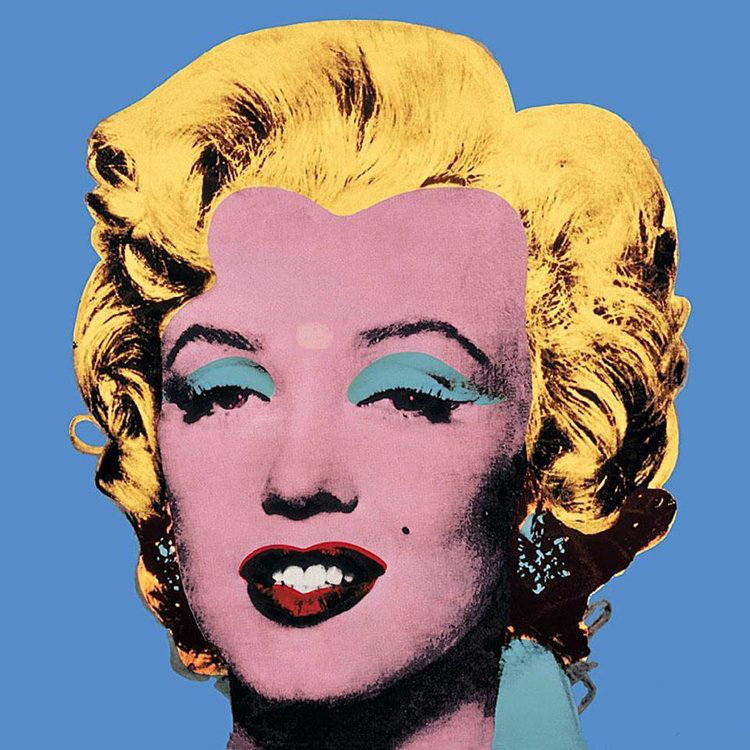

In [170]:
image = Image.open('BLUE.jpeg')
image

In [184]:
def recolor(Im,cluster,color):   
    im = Im
    pix = im.load()
    ind = df.loc[df['Cluster'] == cluster,['x','y']]
    for i,j in zip(list(ind['x']),list(ind['y'])):
        pix[i,j] = color
    return im

In [176]:
image = recolor('BLUE.jpeg',0,(237, 206, 200))

In [222]:
image = recolor(image,6,(215, 0, 0))

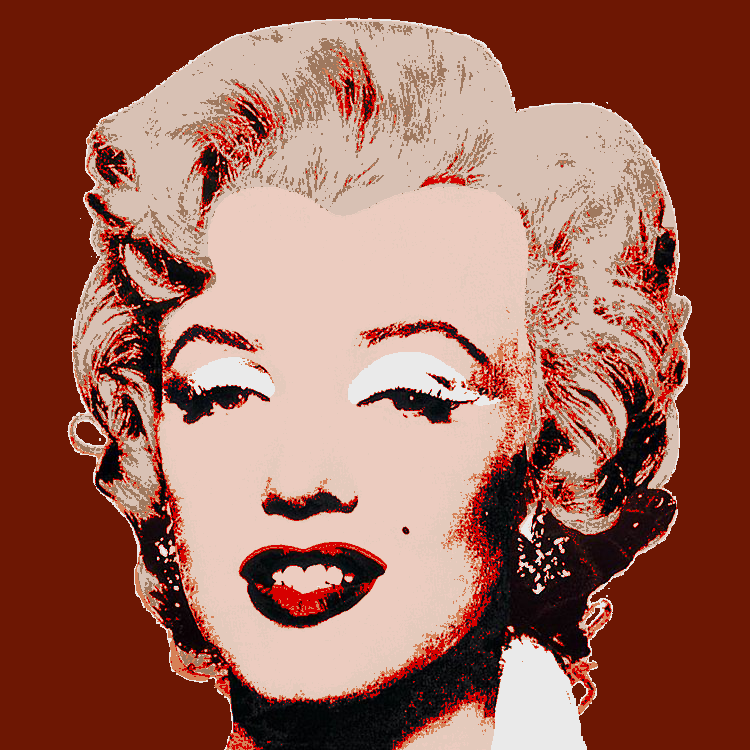

In [223]:
image

In [225]:
image.save('Natural.png')

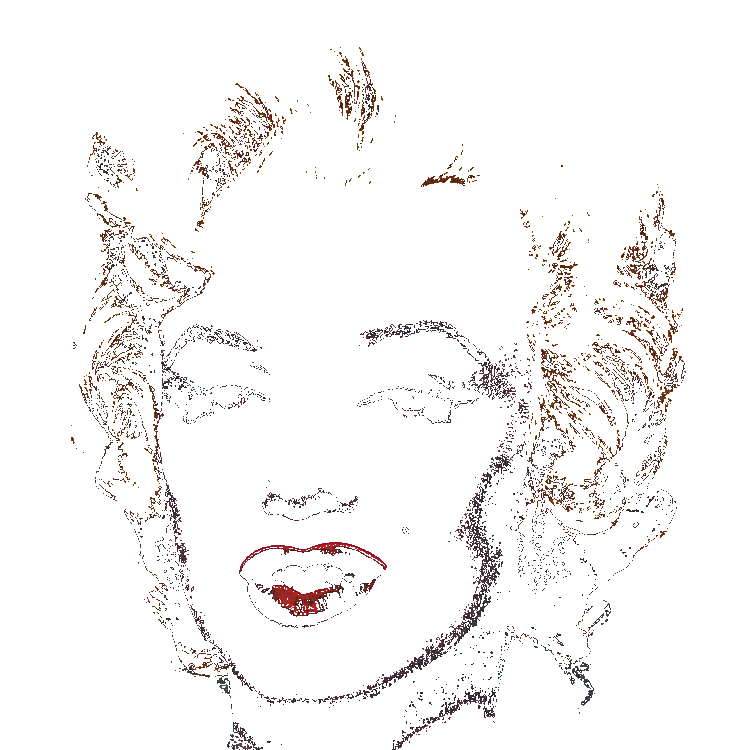

In [219]:
inspect('BLUE.jpeg',6)

In [135]:
clusters = [inspect(i) for i in range(9)]

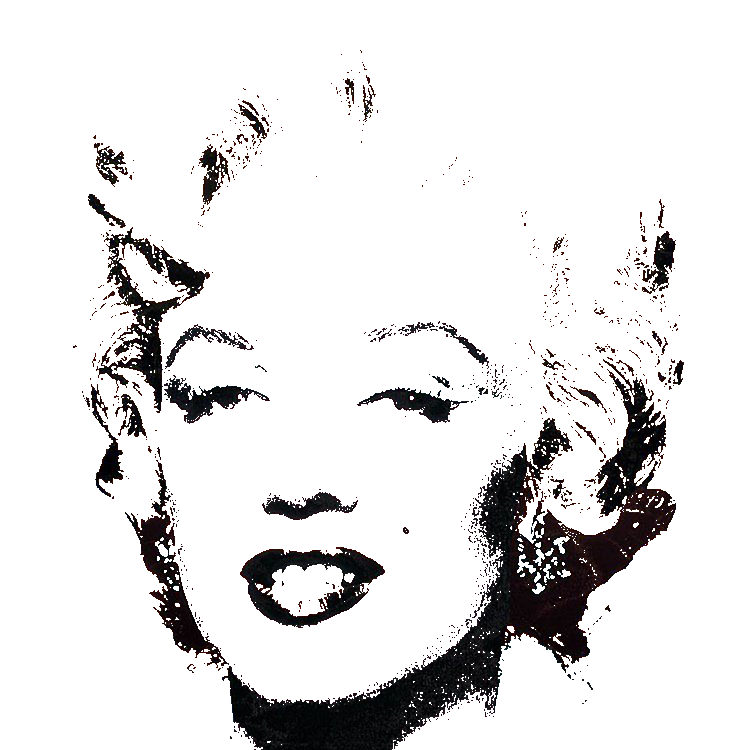

In [163]:
inspect(1)

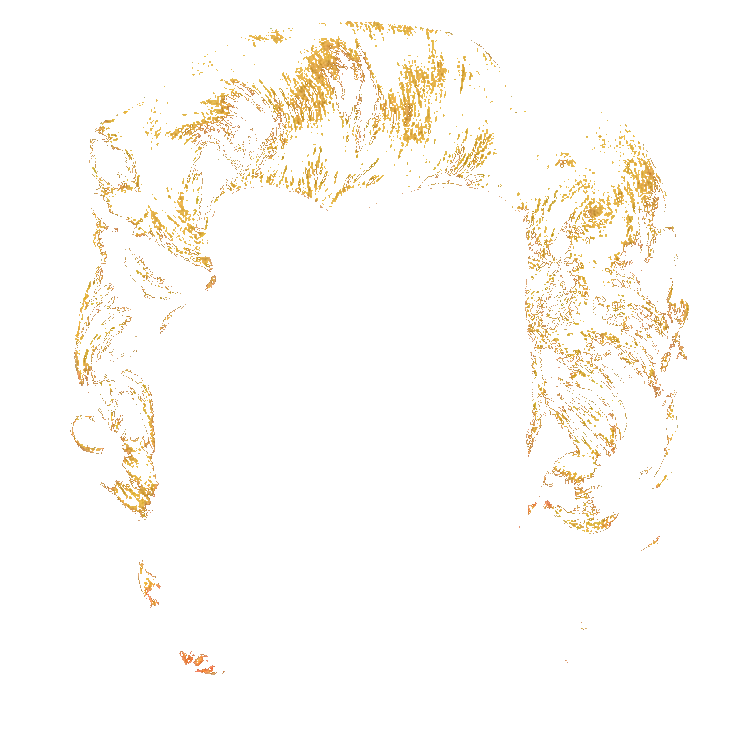

In [142]:
clusters[0]

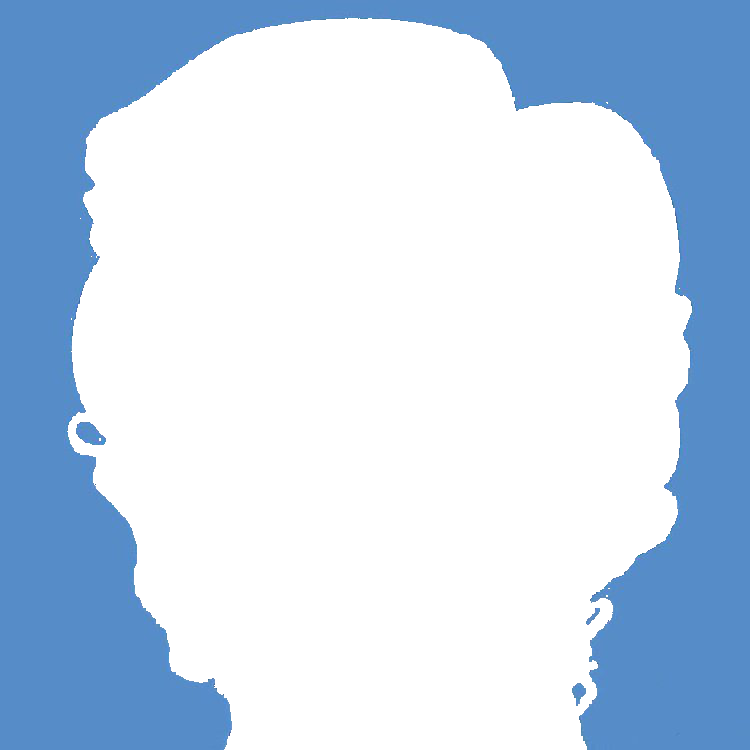

In [143]:
clusters[1]

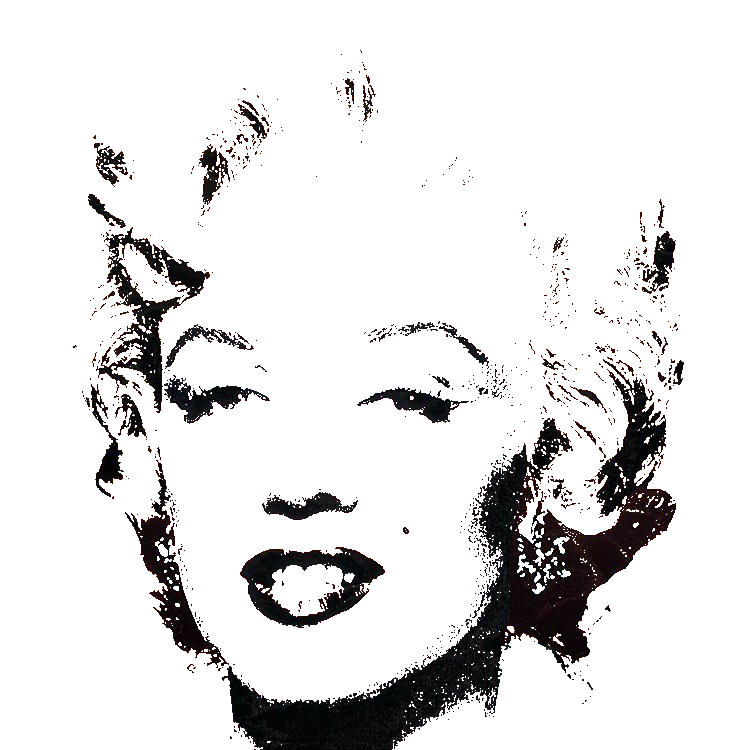

In [144]:
clusters[2]

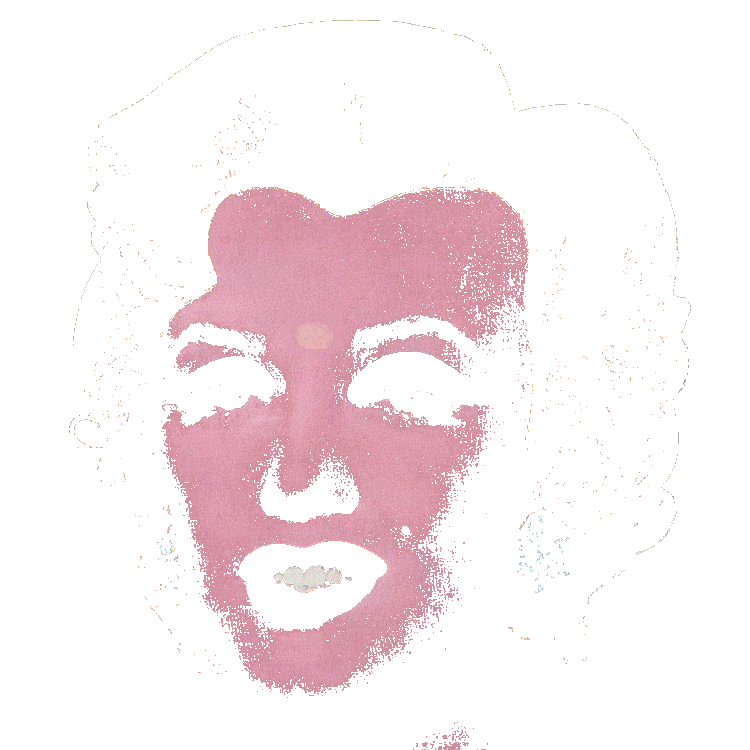

In [145]:
clusters[3]

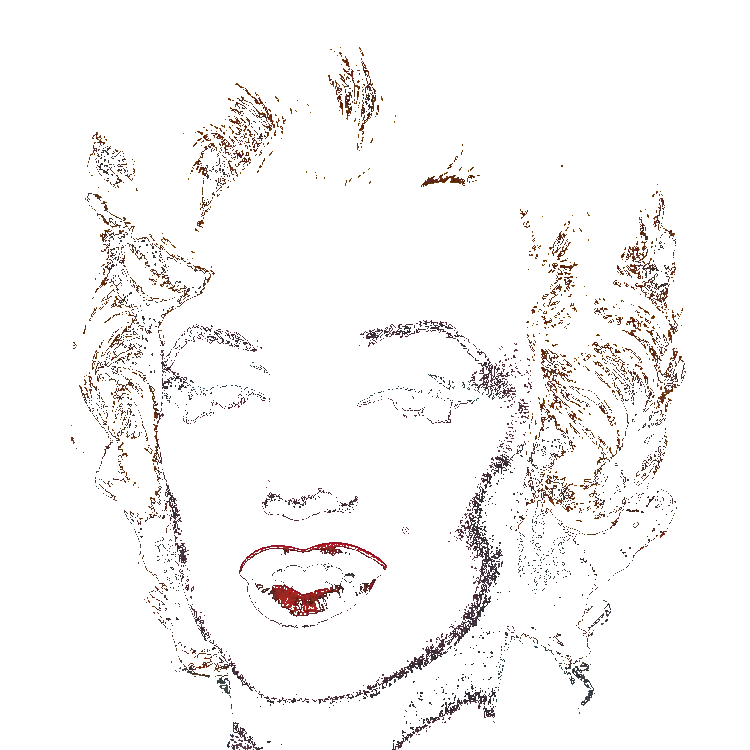

In [146]:
clusters[4]

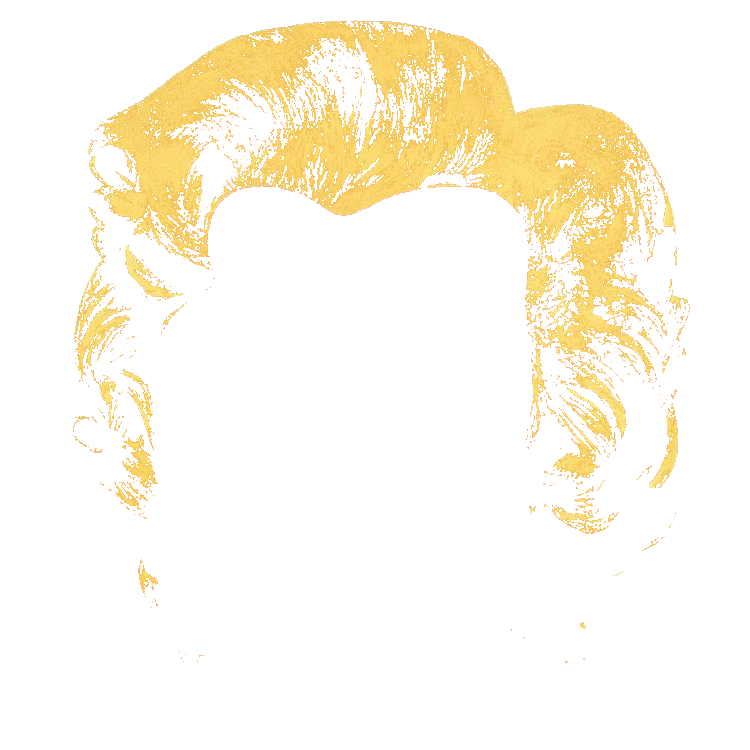

In [147]:
clusters[5]

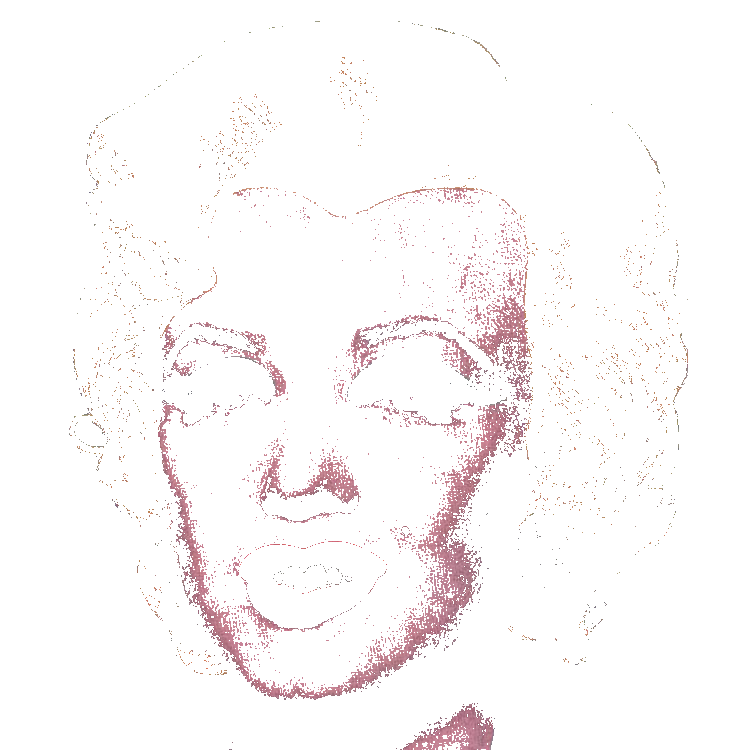

In [148]:
clusters[6]

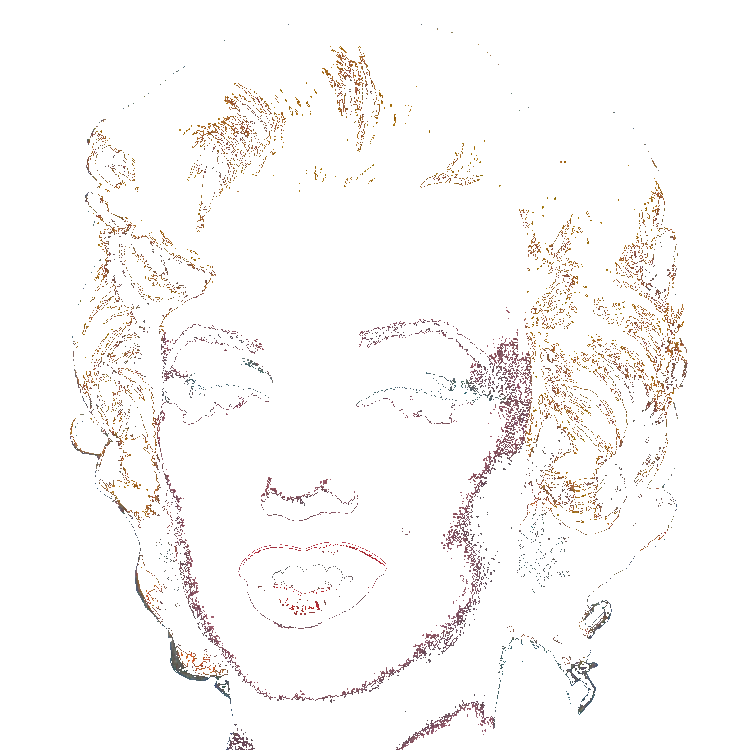

In [149]:
clusters[7]

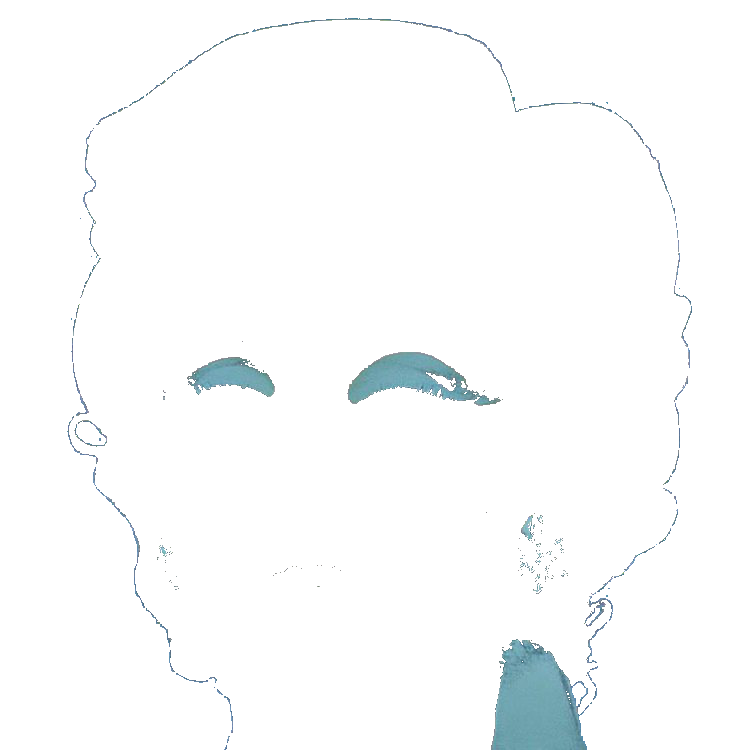

In [150]:
clusters[8]